In [ ]:
cd ..

In [58]:
import torch 
import torch.nn as nn

import pickle, os, random
import numpy as np
import matplotlib.pyplot as plt

from pre_processing import Voc
from settings import *

from sklearn.manifold import TSNE
# from openTSNE import TSNE

In [6]:
with open(save_dir + '/voc.pkl',  'rb') as f:
    voc   = pickle.load(f)
    
hidden_size = 500

chkpt_dir = os.path.join(save_dir, "checkpoints")
chkpt = os.listdir(chkpt_dir)[-1]
loadFilename = os.path.join(chkpt_dir,chkpt)
checkpoint = torch.load(loadFilename)


embedding = nn.Embedding(voc.num_words, hidden_size)
embedding.load_state_dict(checkpoint['embedding'])

In [65]:
weight_matrix.shape[0]

13762

In [11]:
weight_matrix = embedding.weight.detach().numpy()

In [59]:
%%time
X_embedded = TSNE(n_components=2).fit_transform(weight_matrix)
X_embedded.shape

CPU times: user 12min 44s, sys: 20.4 s, total: 13min 5s
Wall time: 5min 5s


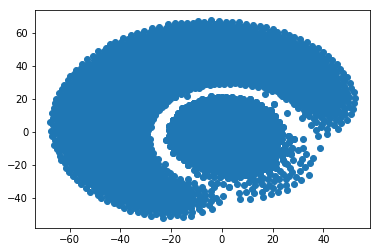

In [60]:
plt.scatter(X_embedded[:,0],X_embedded[:,1])

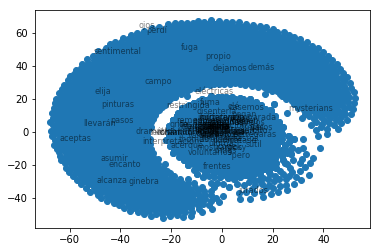

In [77]:
n_tags=100
tag_idxs = random.sample(list(range(weight_matrix.shape[0])),n_tags)
for ind in tag_idxs:
    word = voc.index2word[ind]
    x = X_embedded[ind, 0]
    y = X_embedded[ind, 1]
    plt.annotate(word, alpha=0.5, xy=(x, y), xytext=(5, 2),textcoords='offset points', ha='right', va='bottom', size=8)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
